Netflix is a streaming service that offers a wide variety of award-winning TV shows, movies, anime, documentaries and more – on thousands of internet-connected devices.

IMDb (an acronym for Internet Movie Database) is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews.IMDb registered users can cast a vote (from 1 to 10) on every released title in the database. Individual votes are then aggregated and summarized as a single IMDb rating, visible on the title's main page. By "released title" we mean that the movie (or TV show) must have been shown publicly at least once (including festival screening).
Here we have dataset from Kaggle which has the info regarding different Netflix shows, their IMDB score runtime etc. We explore it to know :
*top rated Netflix shows
*most watched genres
*most preferred language for shows

In [1]:
# importing libs
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import datetime as dt
import squarify

In [2]:

filename = "/kaggle/input/netflixoriginals/NetflixOriginals.csv"
df = pd.read_csv(filename)
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


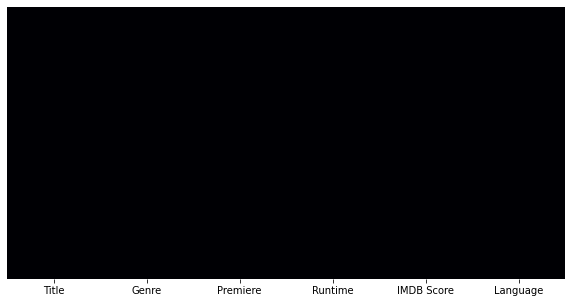

In [4]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5)) 
sns.heatmap(df.isnull(),cmap='magma',yticklabels=False,cbar=False)
plt.show()

In [5]:
df['Genre'].unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

In [6]:
df.shape

(584, 6)

In [7]:
df['IMDB Score'].unique()

array([2.5, 2.6, 3.2, 3.4, 3.5, 3.7, 3.9, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6,
       4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9,
       6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2,
       7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5,
       8.6, 9. ])

In [8]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

Barplot of the top 50 shows which have the top imdb score

In [9]:
topfiftystart=[]
for shows in df['Title'].unique():
    data=df[df['Title']==shows]   
    sum=np.sum(data['IMDB Score'])         
    topfiftystart.append([shows,sum])

shows=pd.DataFrame(topfiftystart,columns=['Title','IMDB Score']) 
shows.sort_values(by='IMDB Score',ascending=False,inplace=True)

In [10]:
shows

,Title,IMDB Score
583,David Attenborough: A Life on Our Planet,9.0
582,Emicida: AmarElo - It's All For Yesterday,8.6
581,Springsteen on Broadway,8.5
580,Winter on Fire: Ukraine's Fight for Freedom,8.4
579,Taylor Swift: Reputation Stadium Tour,8.4
...,...,...
4,Kaali Khuhi,3.4
3,The Open House,3.2
2,The App,2.6
1,Dark Forces,2.6


In [11]:

shows=shows[:11]

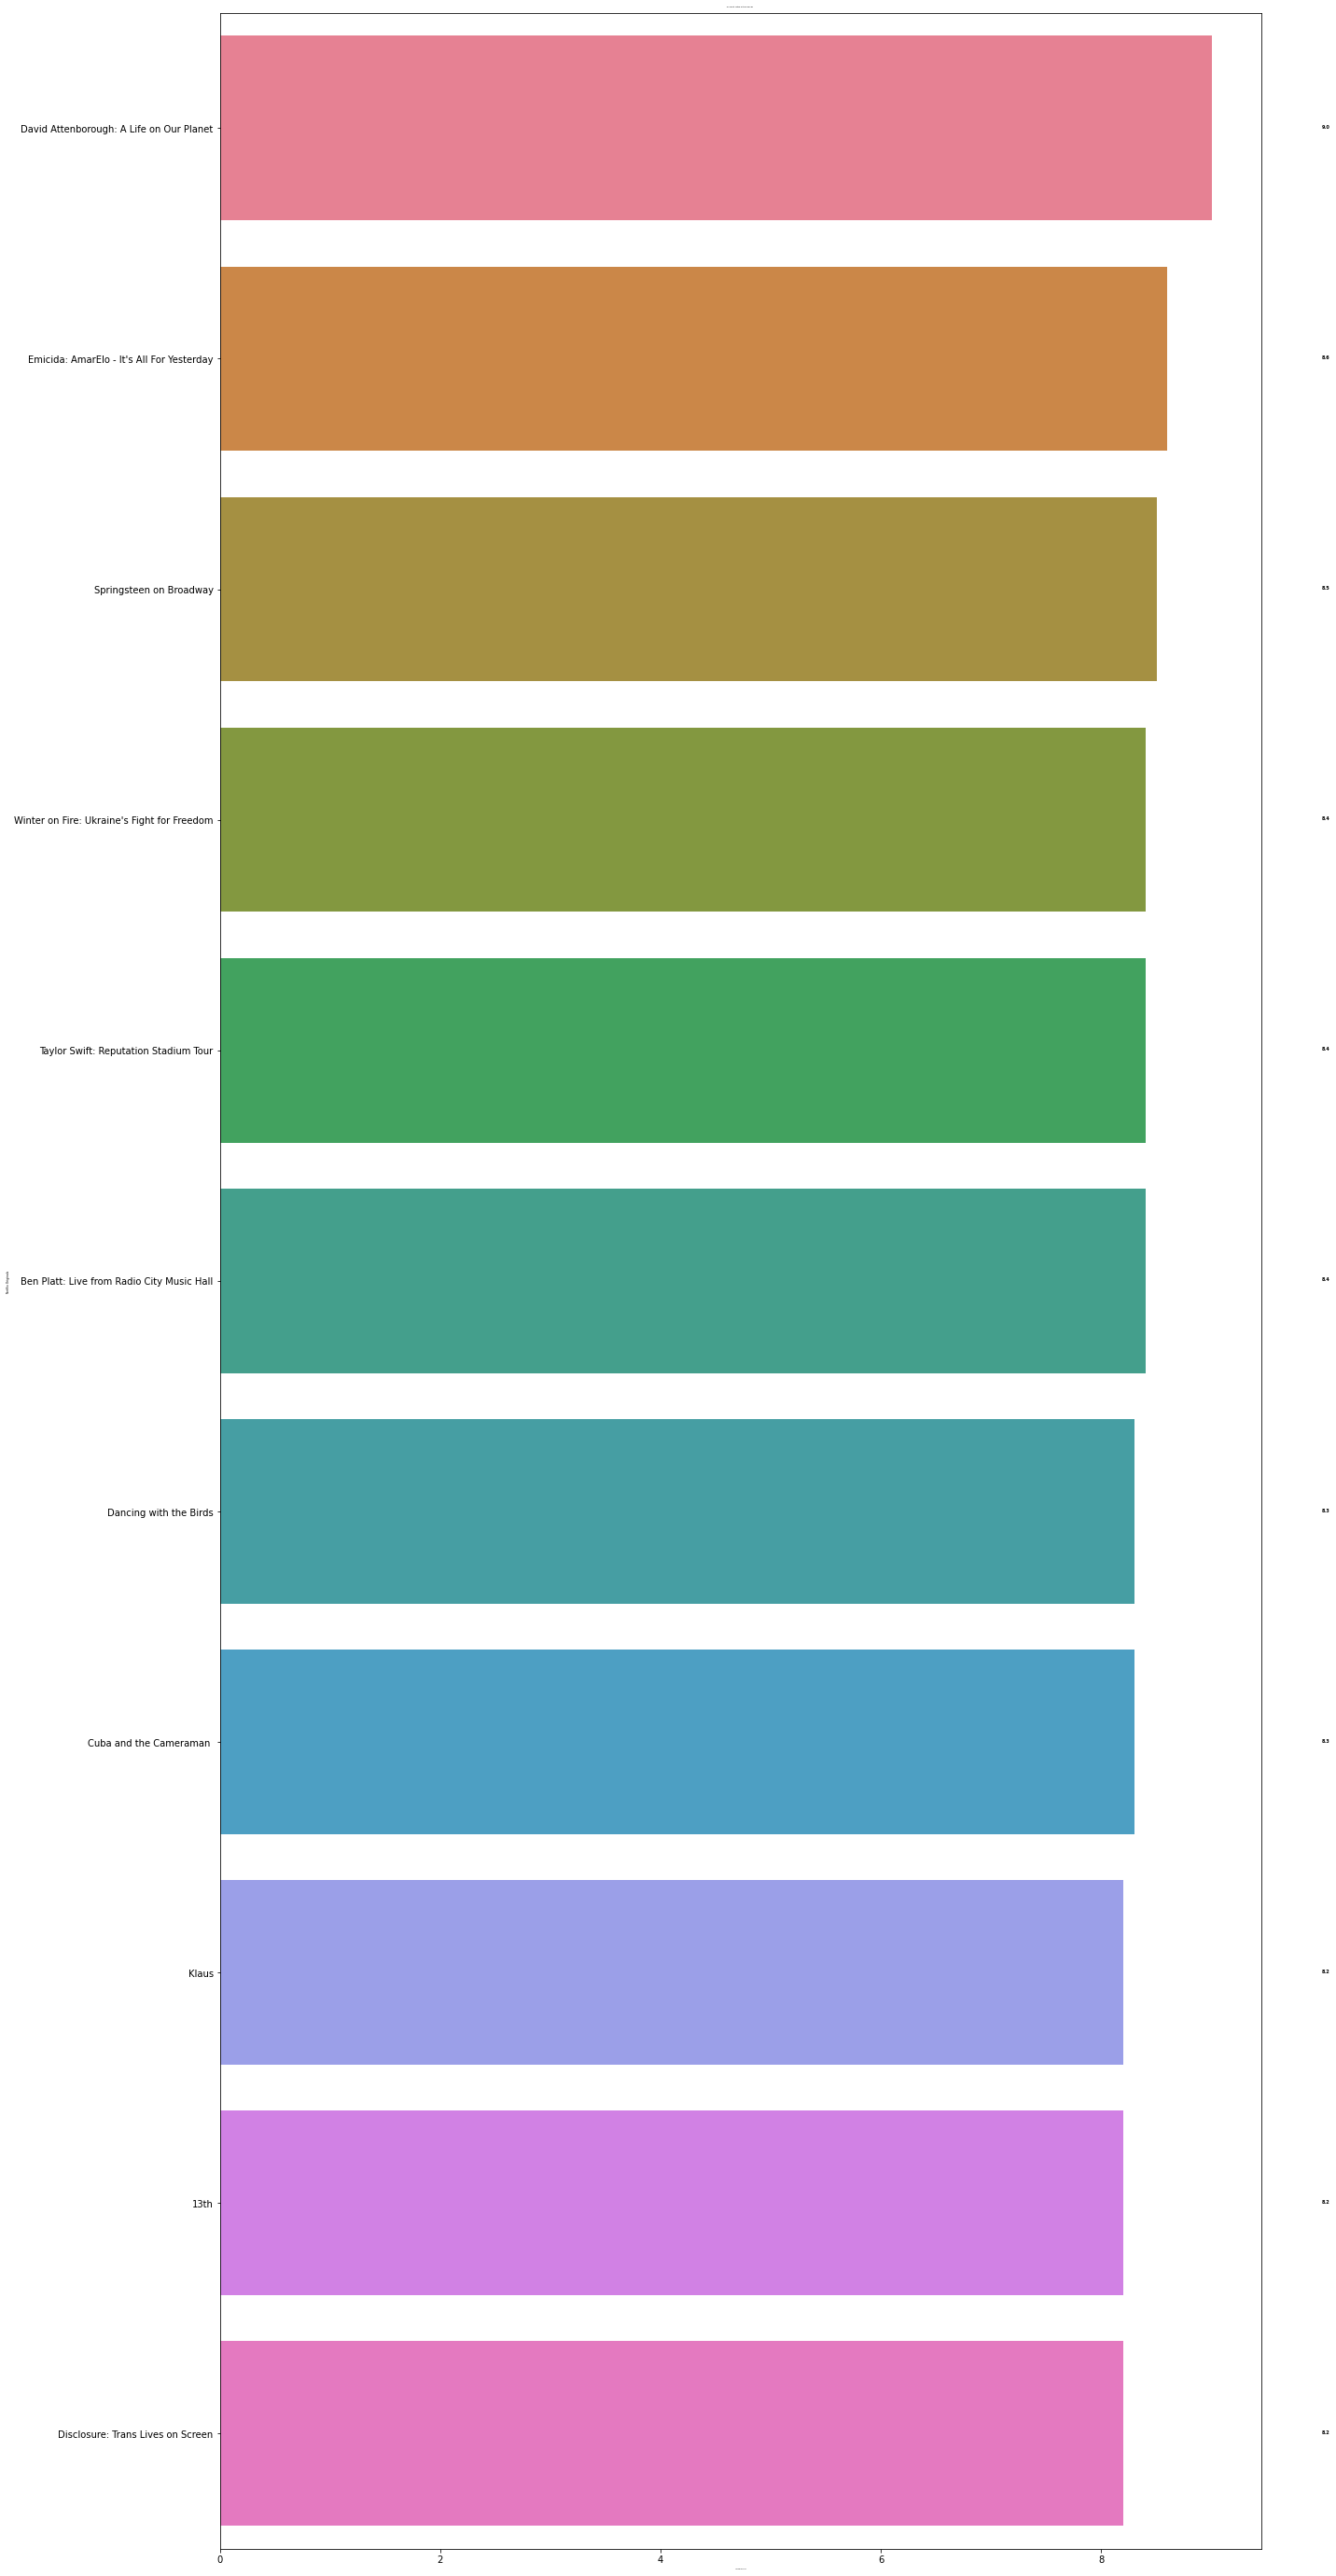

In [12]:
## visualising the IMDB Score of the top 50 most rated Netflix shows
plt.figure(figsize=(20,50))
ax = sns.barplot(x="IMDB Score", y="Title",data=shows, palette="husl",linewidth = 2,label='big')
for i,j in enumerate(shows["IMDB Score"]):
    ax.text(10, i, j, weight="bold", color = 'black', fontsize =5,ha='left')
plt.title("50 most rated Netflix shows ",fontsize=2)
ax.set_xlabel(xlabel = 'IMDB Score', fontsize = 2)
ax.set_ylabel(ylabel = 'Netflix Originals', fontsize = 3)
plt.show()
del shows

From the above graph,we can see that David Attenborough: A Life on Our Planet is the most rated Netflix show.

In [13]:
company=df.copy()

In [14]:
company.sort_values(by='Runtime',ascending=False,inplace=True) 
company=company[:10]

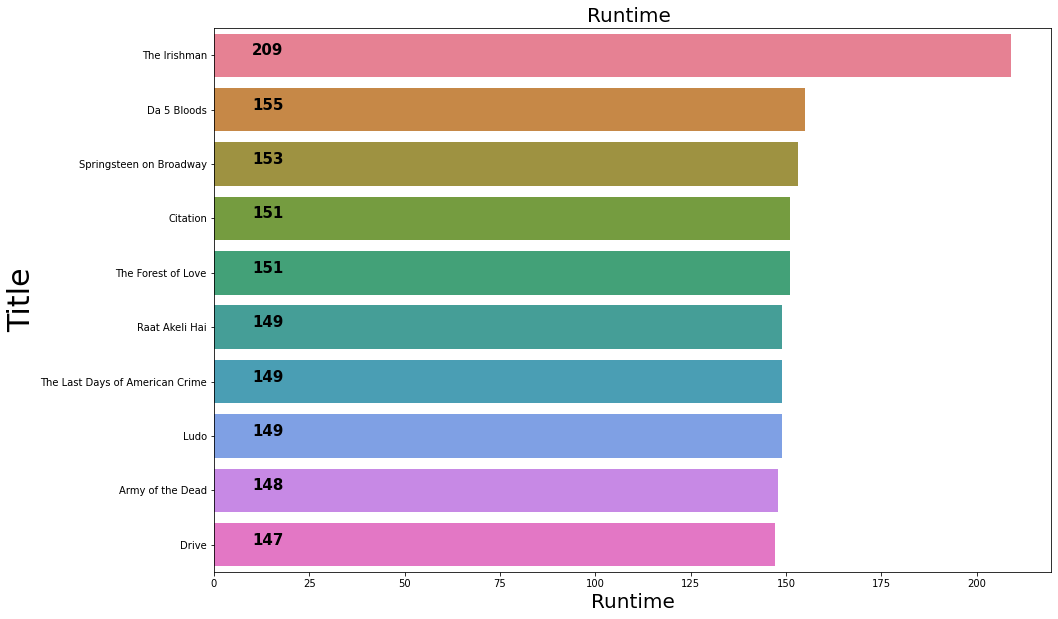

In [15]:

plt.figure(figsize=(15,10))
ax = sns.barplot(x="Runtime", y="Title",data=company, palette="husl",linewidth = 2,label='big')
for i,j in enumerate(company["Runtime"]):
    ax.text(10, i, j, weight="bold", color = 'black', fontsize =15,ha='left')
plt.title("Runtime ",fontsize=20)
ax.set_xlabel(xlabel = 'Runtime', fontsize = 20)
ax.set_ylabel(ylabel = 'Title', fontsize = 30)
plt.show()
del company

In [16]:
names = df[df['Genre']!='others']["Genre"]

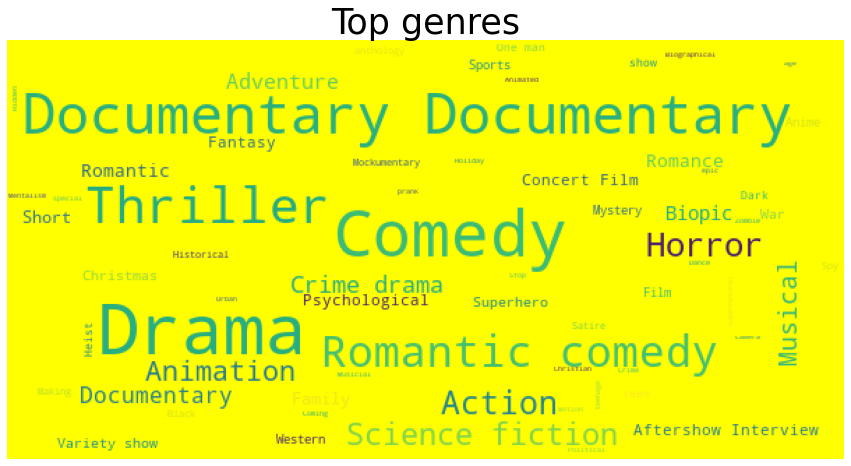

In [17]:
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color='yellow').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Top genres", fontsize=35)
plt.axis("off")
plt.show()

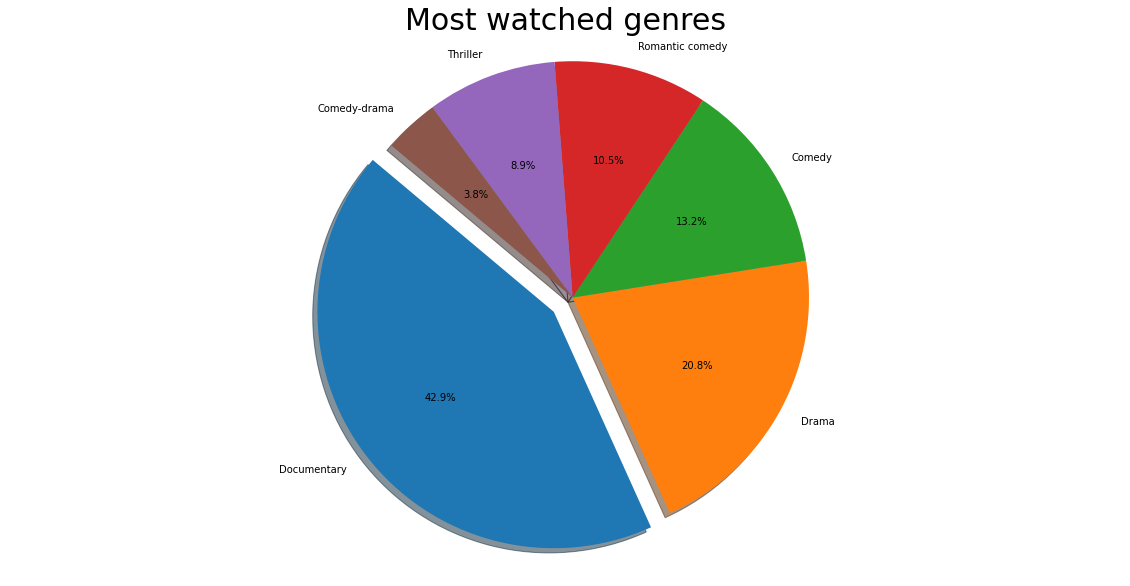

In [18]:
d=df[df['Genre']!='others']['Genre'].value_counts().head(6)
explode = (0.1, 0, 0, 0,0,0)
fig1,ax1=plt.subplots(figsize=(20,10))

ax1.pie(d.values,explode=explode, labels=d.index,autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
plt.title("Most watched genres",fontsize=30)
plt.show()

Through the above pie graph we can see that 

Text(0.5, 1.0, 'Most preferred languages for shows')

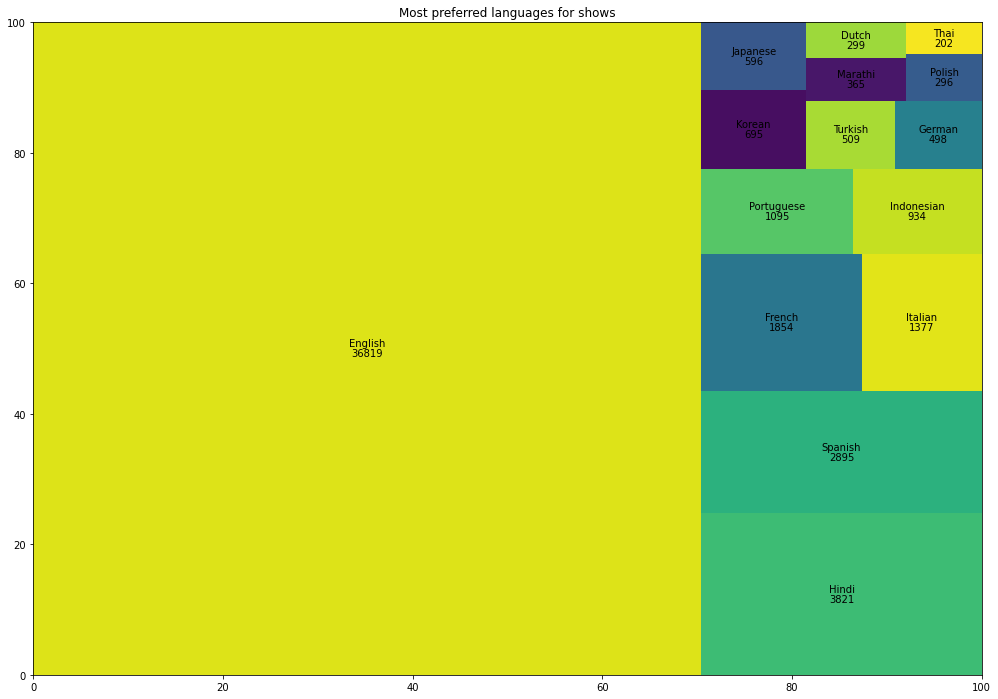

In [19]:
plt.figure(figsize=(17,12))
mean_amount = df.groupby('Language').sum()["Runtime"].sort_values(ascending=False).head(15)
squarify.plot(sizes=mean_amount.values,label=mean_amount.index, value=mean_amount.values)
plt.title('Most preferred languages for shows')

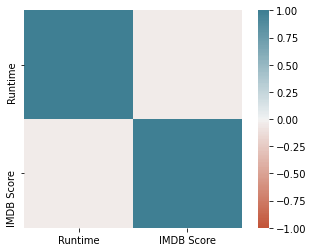

In [20]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
df.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [24]:
v = TfidfVectorizer(stop_words='english',analyzer='word',max_features=500) ## vector should create vector for 800 most weightage words
x = v.fit_transform(df['Title'])

In [26]:
df.reset_index(drop=True,inplace=True) 

In [27]:
t=x.toarray()   # converting vector list to array

In [28]:
dt=pd.DataFrame(t)

In [29]:
dt

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
data=pd.concat([df,dt],axis=1)   ## concatenating the tf-idf vectors with prevoius dataframe

In [31]:
from sklearn import preprocessing

In [32]:
le = preprocessing.LabelEncoder()

In [35]:
data['Genre']=le.fit_transform(data['Genre'])
data['Language']=le.fit_transform(data['Language'])



In [36]:
## drop the non-featured attributes
data.drop(labels=['Title','Genre','Premiere','Language'],inplace=True,axis=1)

In [37]:
data

,Runtime,IMDB Score,0,1,2,3,4,5,6,7,...,490,491,492,493,494,495,496,497,498,499
0,58,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,81,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,94,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,90,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,125,8.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
580,91,8.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581,153,8.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
582,89,8.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
## importing the libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from numpy import absolute
import pickle

In [40]:
model= Ridge(normalize=True,alpha=0.1) ## normalize the value for faster convergence while gradient descent
cv = RepeatedKFold(n_splits=20, n_repeats=3, random_state=32)   # k-fold cross validation with k=20
scores = cross_val_score(model,data.loc[:, data.columns != 'Runtime'],data['Runtime'], scoring='neg_median_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 13.866 (3.331)


In [ ]:
pickle.dump(model,open('ridge_reg.pkl','wb'))

We get the overall mean absolute error of 13.886 from our model.

In [41]:
#importing lib for lasso regression
from sklearn import linear_model

In [44]:
 clf = linear_model.Lasso(alpha=0.1,normalize=True)
 cv = RepeatedKFold(n_splits=20, n_repeats=3, random_state=32)
scores = cross_val_score(clf,data.loc[:, data.columns != 'Runtime'],data['Runtime'], scoring='neg_median_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 11.728 (2.911)


From above we can see that the overall Mean absolute error by Lasso Regression is less than the Ridge Regression.

In [45]:
pickle.dump(clf,open('lasso_reg.pkl','wb'))

Conclusion:

*David Attenborough: A Life on Our Planet is the most rated Netflix show.

*Most watched genre is documentary.

*Most preferred language for shows is English.



